<a href="https://colab.research.google.com/github/TerriblePepito/TerriblePepitostest/blob/main/tradestypesdraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

# Ouvrir la boîte de dialogue pour télécharger le fichier
uploaded = files.upload()

# Lire le fichier CSV téléchargé dans un DataFrame
for filename in uploaded.keys():
    df = pd.read_csv('datajantest2.csv',delimiter=';', on_bad_lines='warn',encoding='latin-1')  # Importer le fichier CSV
    print(df.head())  # Afficher les premières lignes du DataFrame

Saving datajantest2.csv to datajantest2.csv
  Instrument  Volume        Date  Vendu    buy   P/P
0     CUCUSD    -400  2024-12-30   4,08   4,08  4,78
1     XAGUSD     -40  2025-01-06  29,00  29,21  7,26
2     EURUSD   -8000  2024-12-31   1,04   1,04  4,27
3     CUCUSD    -400  2024-12-31   4,00   4,01  3,76
4     XAGUSD     -40  2024-12-30  29,20  29,31  4,02


In [14]:
print(df.dtypes)

Instrument            object
Volume                 int64
Date          datetime64[ns]
Vendu                float64
buy                  float64
P/P                  float64
dtype: object


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-25-ee1bbf4e0e08>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Instrument', data=df, palette='pastel')


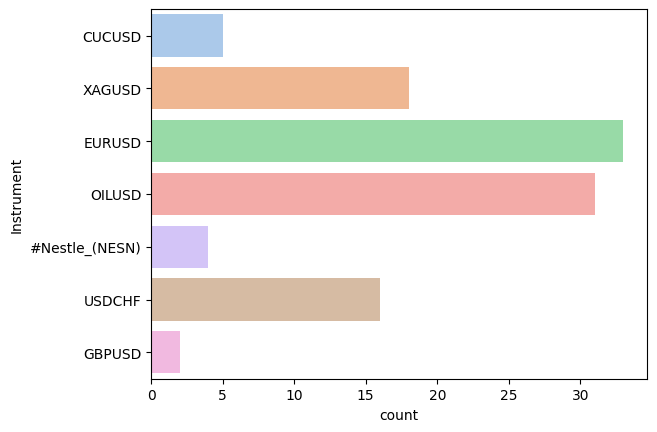

In [25]:
sns.countplot(y='Instrument', data=df, palette='pastel')
plt.show()

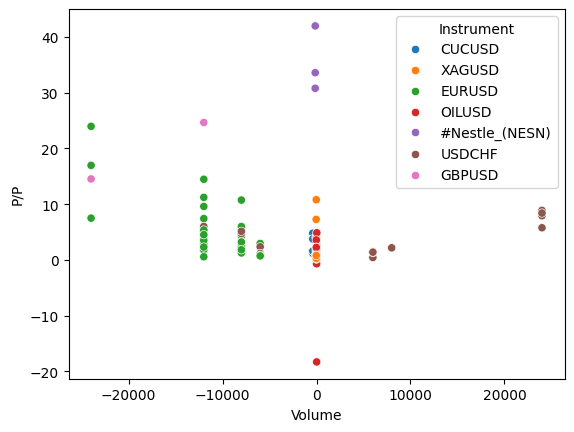

In [31]:
sns.scatterplot(x='Volume', y='P/P', data=df, hue="Instrument")
plt.show()

In [ ]:
subgroups = []

In [39]:
#subgroup of EUR/USD
dfvalue=df.loc[df['Instrument']=='EURUSD',['P/P','Volume']]

In [34]:
df['P/P'] = df['P/P'].str.replace(',', '.').astype(float)


AttributeError: Can only use .str accessor with string values!

In [13]:
df['Vendu'] = df['Vendu'].str.replace(',', '.').astype(float)
df['buy'] = df['buy'].str.replace(',', '.').astype(float)

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

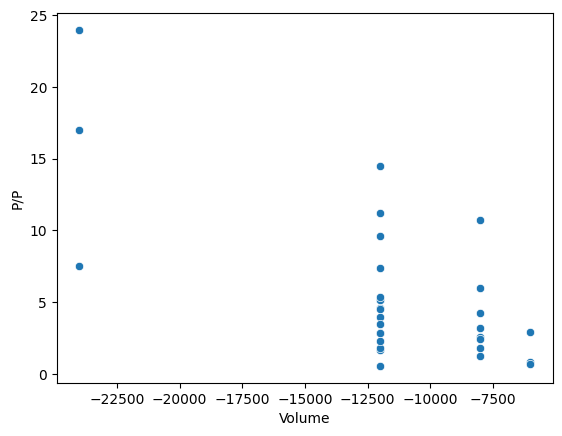

In [41]:
sns.scatterplot(x='Volume', y='P/P', data=dfvalue, hue=)
plt.show()